In [21]:
import numpy as np

grid_size = (5,5,5)
n_points = np.prod(grid_size)
params = np.zeros(np.prod(grid_size)*3)
for i, p in enumerate(np.ndindex(grid_size)):
    params[i] = p[2]
    params[n_points + i] = p[1]
    params[2*n_points + i] = p[0]

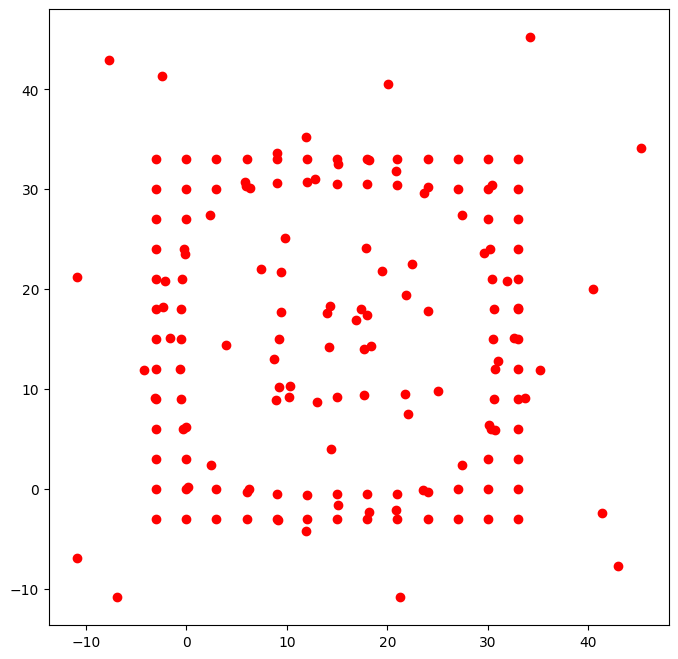

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

x = np.loadtxt("points.txt")
spacing = [3, 3, 3]
size = [13, 13, 13]
slice = 6

plt.figure(figsize=(8,8))
for p in x:
    if p[2] == slice:
        plt.scatter(p[3], p[4], c="r")

2022-10-11 00:13:01,522 - Wrapper - INFO - Running elastix in: /home/joasiee/Documents/projects/elastix/experiments/output/1665439981_synthetic_1_adaptivestochasticgradientdescent_522433



elastix is started at Tue Oct 11 00:13:01 2022.

which elastix:   /home/joasiee/Documents/projects/elastix/build/Release/bin/elastix
elastix runs at: bequiet
  Linux 5.15.72-1-MANJARO (x64), #1 SMP PREEMPT Thu Oct 6 07:30:22 UTC 2022
  with 31844 MB memory, and 10 cores @ 3700 MHz.
-------------------------------------------------------------------------

Running elastix with parameter file 0: "/home/joasiee/Documents/projects/elastix/experiments/output/1665439981_synthetic_1_adaptivestochasticgradientdescent_522433/params.txt".

Current time: Tue Oct 11 00:13:01 2022.
Reading the elastix parameters from file ...

Installing all components.
InstallingComponents was successful.

ELASTIX version: 5.0.1
Command line options from ElastixBase:
-f        /home/joasiee/Documents/projects/instances/synthetic/scans/01_Fixed.mhd
-m        /home/joasiee/Documents/projects/instances/synthetic/scans/01_Moving.mhd
-fMask    unspecified, so no fixed mask used
-mMask    unspecified, so no moving mask

2022-10-11 00:13:02,271 - Validation - INFO - Calculating validation metrics:
computing bending energy: 100%|██████████| 27000/27000 [00:02<00:00, 12138.33it/s]
2022-10-11 00:13:04,499 - Validation - INFO - Bending Energy: 0.0
2022-10-11 00:13:04,580 - Validation - INFO - Jacobian min,max: 1.0, 1.0
2022-10-11 00:13:04,601 - Validation - INFO - DVF RMSE: 0.24881047059304162
2022-10-11 00:13:04,603 - Validation - INFO - Dice Similarity: 0.9273182957393483
2022-10-11 00:13:04,604 - Validation - INFO - Jaccard Similarity: 0.8806584362139919
2022-10-11 00:13:05,446 - Validation - INFO - Weighted Hausdorff Distance: 1.5000006953189071
2022-10-11 00:13:05,472 - Validation - INFO - Weighted Mean Surface Distance: 1.5000001863948327
2022-10-11 00:13:05,472 - Validation - INFO - TRE: 1.4999999435994111
2022-10-11 00:13:05,841 - Validation - INFO - Validation metrics calculated in 3.57s
2022-10-11 00:13:05,842 - Wrapper - INFO - Run ended successfully. It took 4.3197 seconds


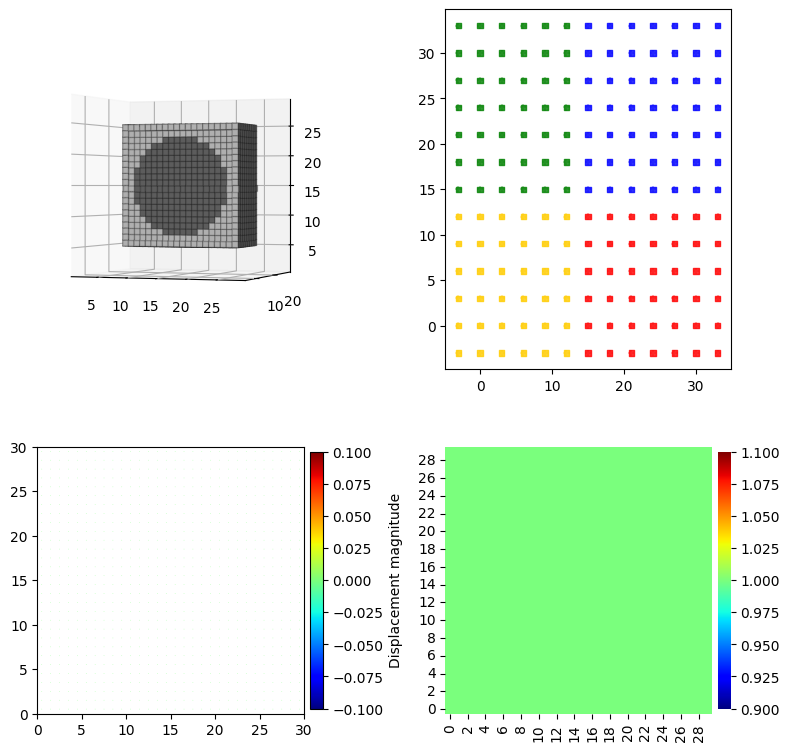

In [5]:
from pathlib import Path
from thesispy.elastix_wrapper.wrapper import run
from thesispy.elastix_wrapper.parameters import Parameters
from thesispy.definitions import Collection, ROOT_DIR
from thesispy.experiments.validation import plot_cpoints

params_main = (
        Parameters.from_base(mesh_size=10, metric="AdvancedMeanSquares", seed=2, use_mask=False)
        .asgd()
        .stopping_criteria(0)
        .instance(Collection.SYNTHETIC, 1)
)
_ = run(params_main, ROOT_DIR / "output/" / str(params_main), suppress_stdout=False, visualize=True)